Data Preprocessing

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = r"C:\Users\Md. Ashfaq Bin Hoque\Downloads\archive (1)\face_recognition_dataset\train"

In [7]:
categories = os.listdir(path)
categories = sorted(categories)
label_mapping = {category: label for label, category in enumerate(categories)}

print(categories)
print("Label Mapping:", label_mapping)

['ashfaq', 'khalid', 'rifat', 'shafin']
Label Mapping: {'ashfaq': 0, 'khalid': 1, 'rifat': 2, 'shafin': 3}


In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
images=[]
labels=[]
for category in categories:
  category_path = os.path.join(path, category)
  label = label_mapping[category]
  for file in os.listdir(category_path):
    file_path = os.path.join(category_path, file)
    image = cv2.imread(file_path)
    if image is not None:
      # Convert to RGB for better visualization
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      # Detect faces
      gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      faces = face_cascade.detectMultiScale(gray, 1.1, 4)
      if len(faces) > 0:
        for (x, y, w, h) in faces:
          # Crop the face region
          face_image = image[y:y+h, x:x+w]
          face_image = cv2.resize(face_image, (256, 256))
          face_image = face_image / 255.0
          images.append(face_image)
          labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

(3566, 256, 256, 3)
(3566,)


In [9]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

data = [(train_imgs, train_labels), (test_imgs, test_labels)]

print(f"Training data shape: {np.array(train_imgs).shape}, {np.array(train_labels).shape}")
print(f"Testing data shape: {np.array(test_imgs).shape}, {np.array(test_labels).shape}")

Training data shape: (2852, 256, 256, 3), (2852,)
Testing data shape: (714, 256, 256, 3), (714,)


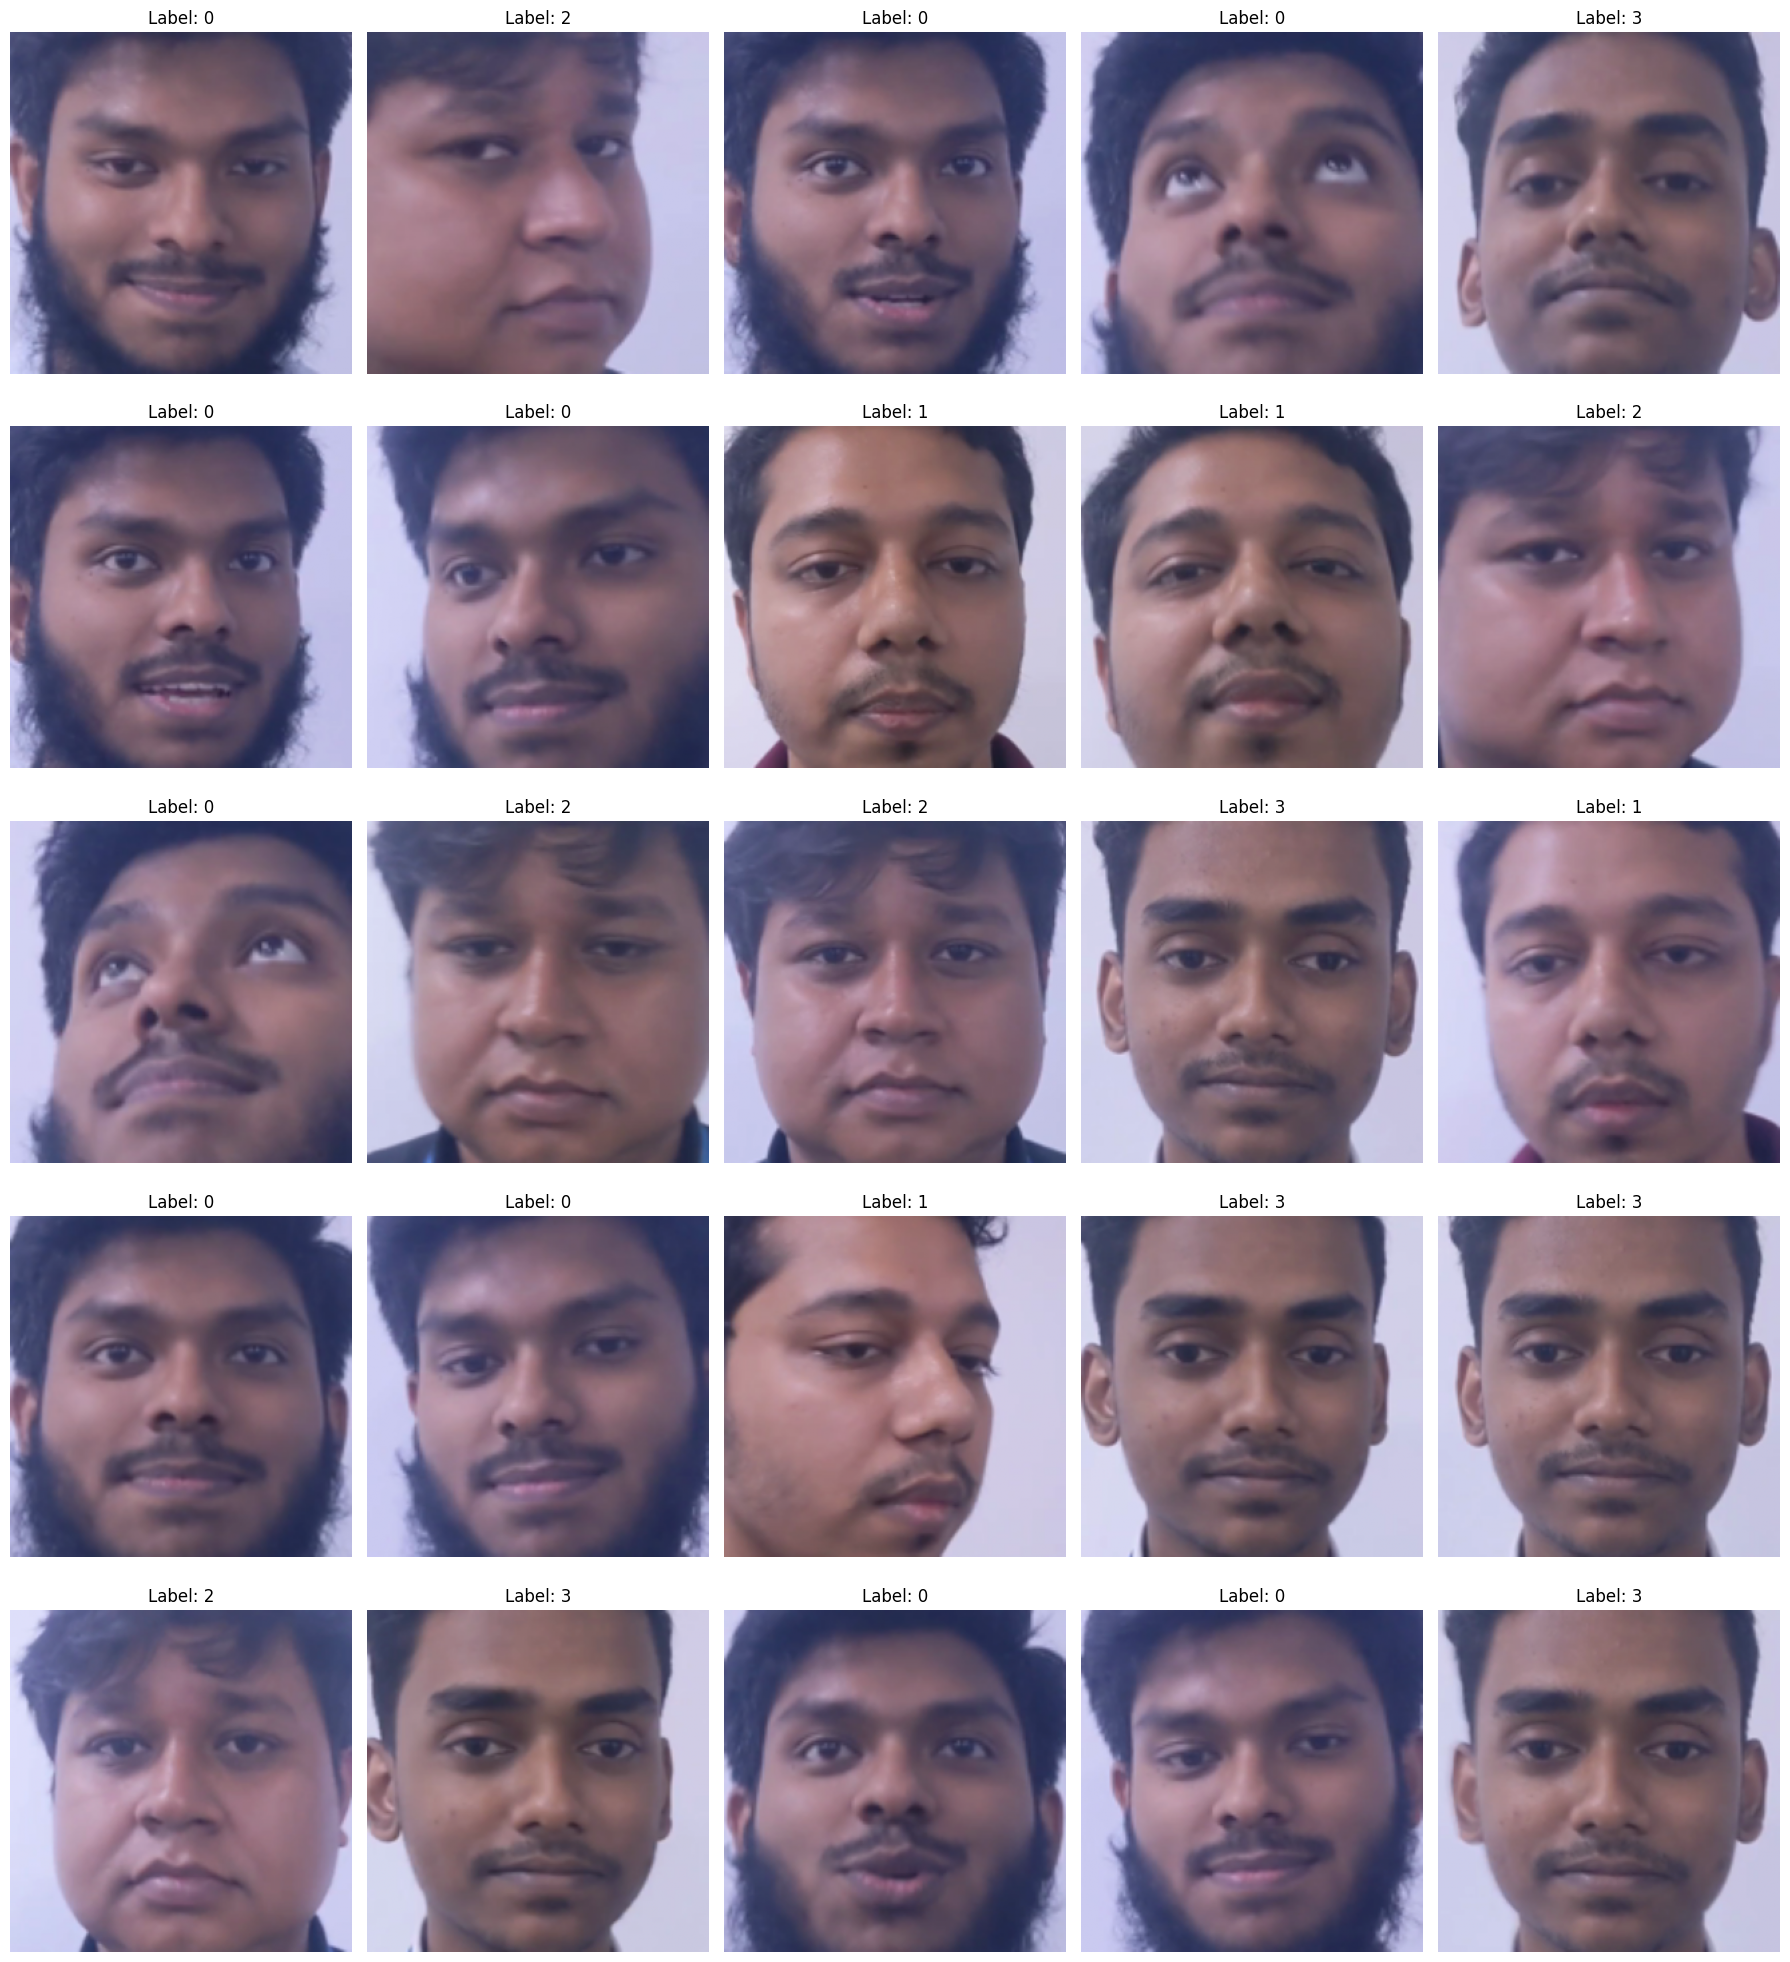

In [10]:
fig, axes = plt.subplots(5, 5, figsize=(18, 20))

for img_array, label, ax in zip(train_imgs, train_labels, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Training Model

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

d:\Notebooks\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,492 (56.64 MB)

 Trainable params: 14,847,492 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x=train_imgs,y=train_labels,batch_size=32,epochs=10,validation_data=(test_imgs,test_labels),verbose=1)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 68s 723ms/step - accuracy: 0.5845 - loss: 1.1341 - val_accuracy: 0.8936 - val_loss: 0.2685
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 60s 667ms/step - accuracy: 0.9827 - loss: 0.0655 - val_accuracy: 0.9958 - val_loss: 0.0163
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 61s 679ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 6.8550e-04
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 62s 692ms/step - accuracy: 0.9971 - loss: 0.0084 - val_accuracy: 0.9986 - val_loss: 0.0041
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 62s 685ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 1.8244e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 61s 675ms/step - accuracy: 1.0000 - loss: 2.2788e-05 - val_accuracy: 1.0000 - val_loss: 6.0981e-05
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 657ms/step - accuracy: 1.0000 - loss: 1.7927e-05 - val_accuracy: 1.0000 - val_loss: 3.3730e-05
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 658ms/step - accuracy: 1.0000 -

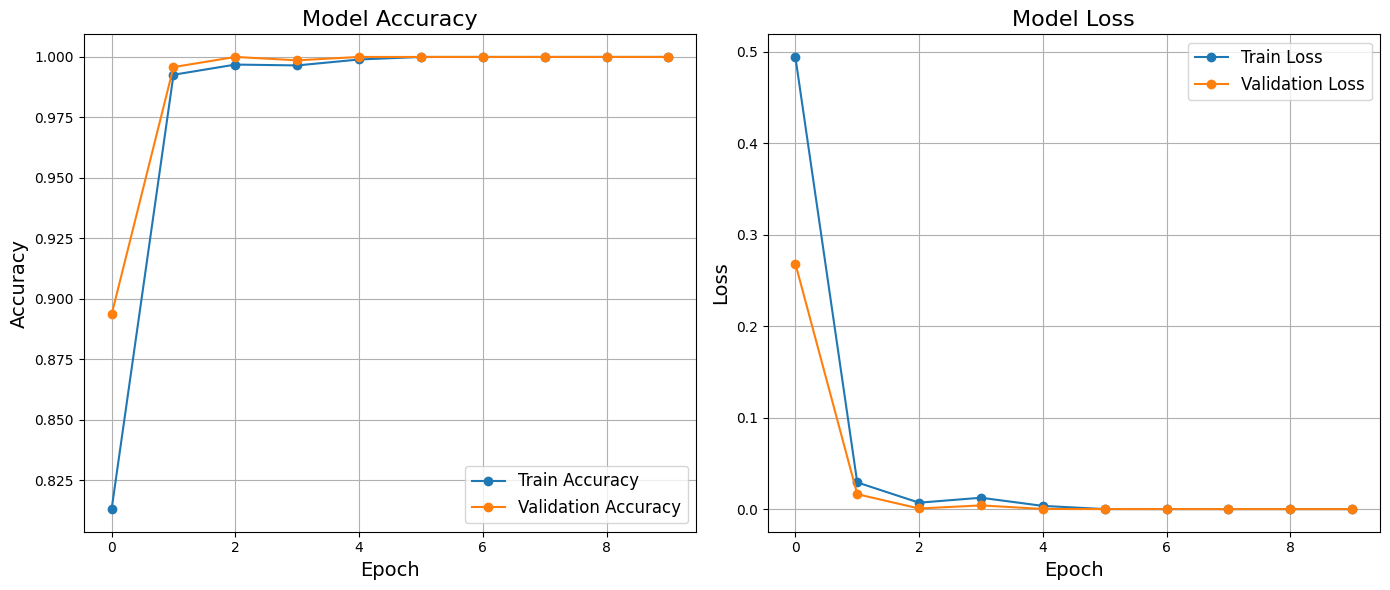

In [16]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [17]:
model.save('face_recognizer_model.h5')
